In [1]:
# library imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Importing and Validation

The original dataset has 15000 rows and 8 columns.


* The **week** column has no redunda value and no null value. No changes to this column were necessary.
  
* The **sales_method** column has 5 distinct unique values ​​and 0 null values. But the sale must have 3 unique values ​​corresponding to each sales method. I encountered dirty values ​​while checking the values ​​in this column. After cleaning out the dirty values ​​in this column, you are left with 3 distinct values ​​for each sales method.
  
* The **customer_id** column has no more values ​​and no null values. No changes were necessary to this column.
  
* The **revenue** column had 1074 missing values. I decided that the best approach to handle these missing values would be to replace them by the mean revenue corresponding to each type of sales_method.

* The **years_as_customer** column has 0 missing values, but we had 2 rows with invalid values. Since our company was founded in 1984, the maximum number of years we can have any customer is 39. Two rows had values ​​with 47 and 63, which we know is not possible. I assume it was just a data entry error and replaced those two values ​​with 39.

* The **nb_site_visits** column has no redundant value and no null value. No changes to this column were necessary.

* The **state** column has 0 missing values and 50 unique values corresponding to each state. No changes to this column were necessary.e.

In [17]:
# import data
sales = pd.read_csv('C:/Users/mamma/Downloads/product_sales.csv')

In [19]:
sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [21]:
sales.shape

(15000, 8)

In [23]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [25]:
sales.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [27]:
# Check the value counts to ensure there are only 3 unique values
print(sales['sales_method'].value_counts())

sales_method
Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: count, dtype: int64


In [39]:
# Change some values
sales['sales_method'] = np.where(sales['sales_method'].str.lower() == 'email', 'Email',
                          np.where(sales['sales_method'].str.lower() == 'call', 'Call',
                          np.where(sales['sales_method'].str.lower() == 'email + call', 'Email + Call',
                          np.where(sales['sales_method'].str.lower() == 'em + call', 'Email + Call',
                                   sales['sales_method']))))
# We check the number of values ​​after the change
print(sales['sales_method'].value_counts())

sales_method
Email           7466
Call            4962
Email + Call    2572
Name: count, dtype: int64


In [41]:
# Find mean revenue for each sales method
average_sales_revenue = sales.groupby('sales_method')['revenue'].mean().round(2)
print(average_sales_revenue)

sales_method
Call             47.60
Email            97.13
Email + Call    183.65
Name: revenue, dtype: float64


In [50]:
# We calculate the average values ​​of the 'revenue' column for each sales method
mean_revenue_by_sales_method = sales.groupby('sales_method')['revenue'].transform('mean')

# We fill the NaN values ​​in the 'revenue' column with the average value of the corresponding sales method
sales['revenue'] = sales['revenue'].fillna(mean_revenue_by_sales_method)

# Check for any null values in the revenue column
print(sales['revenue'].isnull().sum())

0


In [52]:
sales[sales['years_as_customer'] > 39]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


In [56]:
# Find those older than 39 and make it equal to 39
sales.loc[sales['years_as_customer'] > 39, 'years_as_customer'] = 39
# Check to see if replacement worked
sales[sales['years_as_customer'] > 39]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state


In [58]:
# Check number of unique values for state
sales['state'].nunique()

50

In [60]:
# Check if any duplicate rows
duplicate_rows = sales[sales.duplicated()]
duplicate_rows

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state


In [62]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


# Exploratory Analysis

In [77]:
# Find number of customers for each sales method
customers_sales_method = sales['sales_method'].value_counts()
print(customers_sales_method)

sales_method
Email           7466
Call            4962
Email + Call    2572
Name: count, dtype: int64


C:\Users\mamma\AppData\Local\Temp\ipykernel_21224\1584415241.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=customers_sales_method.index, y=customers_sales_method.values, palette="viridis")


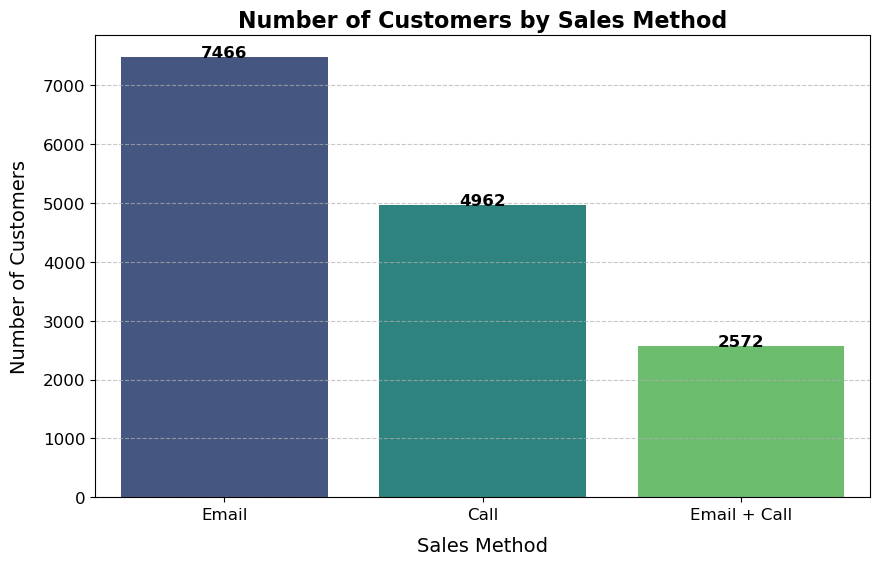

In [93]:
customers_sales_method = sales['sales_method'].value_counts()

sns.set_palette("viridis")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=customers_sales_method.index, y=customers_sales_method.values, palette="viridis")
plt.title("Number of Customers by Sales Method", fontsize=16, weight='bold')
plt.xlabel("Sales Method", fontsize=14, labelpad=10)
plt.ylabel("Number of Customers", fontsize=14, labelpad=10)

for i, v in enumerate(customers_sales_method.values):
    ax.text(i, v + 0.5, f"{v}", ha='center', fontsize=12, fontweight='bold', color='black')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

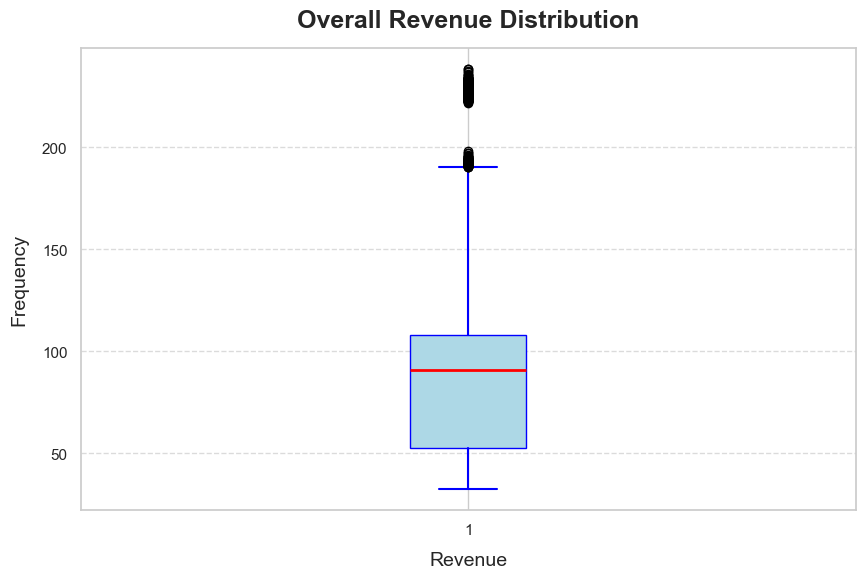

In [101]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
box = plt.boxplot(sales['revenue'], patch_artist=True,
                  boxprops=dict(facecolor='lightblue', color='blue'),
                  medianprops=dict(color='red', linewidth=2),
                  whiskerprops=dict(color='blue', linewidth=1.5),
                  capprops=dict(color='blue', linewidth=1.5))

plt.title('Overall Revenue Distribution', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Revenue', fontsize=14, labelpad=10)
plt.ylabel('Frequency', fontsize=14, labelpad=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\mamma\AppData\Local\Temp\ipykernel_21224\1108061688.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sales_method', y='revenue', data=sales, palette="Set2", linewidth=1.5)


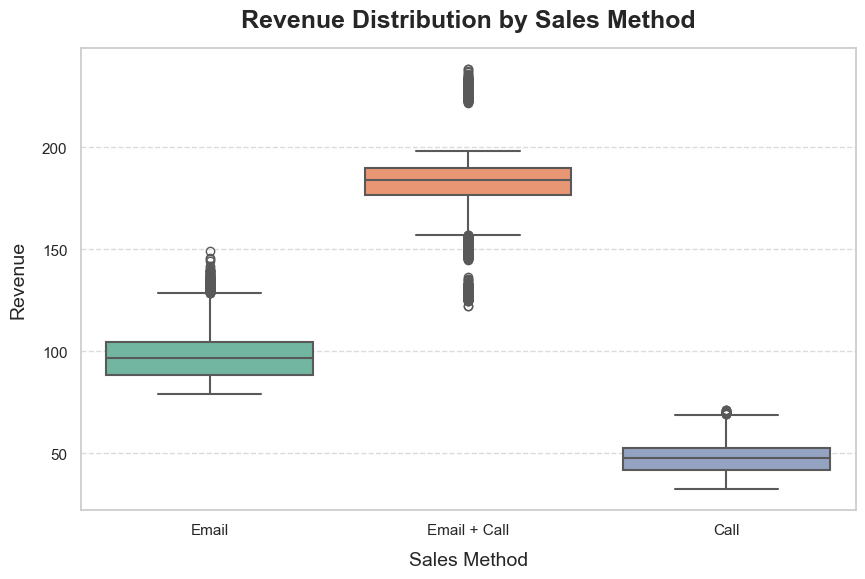

In [117]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='sales_method', y='revenue', data=sales, palette="Set2", linewidth=1.5)
plt.title('Revenue Distribution by Sales Method', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Sales Method', fontsize=14, labelpad=10)
plt.ylabel('Revenue', fontsize=14, labelpad=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

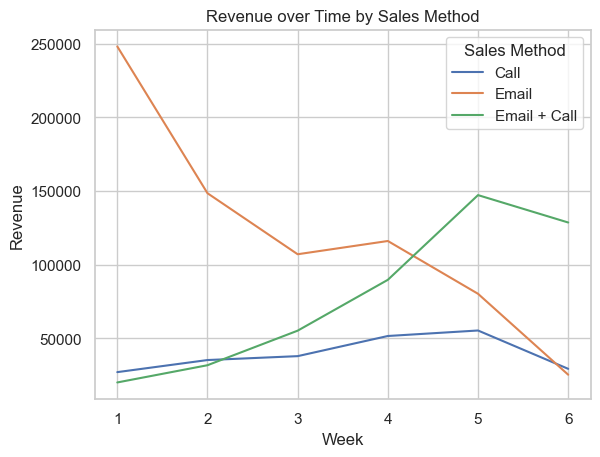

In [103]:
revenue_over_time = sales.groupby(['week', 'sales_method'])['revenue'].sum().unstack()
revenue_over_time.plot()
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.title('Revenue over Time by Sales Method')
plt.legend(title='Sales Method')
plt.show()

In [105]:
revenue_over_time

sales_method,Call,Email,Email + Call
week,,,
1,27015.934407,248122.682313,20007.400954
2,35219.944012,148478.487577,31702.115744
3,37865.583880,107047.993157,55164.933140
4,51545.486149,116044.223157,89682.576419
5,55279.216281,80201.111052,147195.006815
6,29252.466808,25260.792947,128598.937094


C:\Users\mamma\AppData\Local\Temp\ipykernel_21224\965070276.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sales_method', y='years_as_customer', data=sales, palette="Set1", linewidth=1.5)


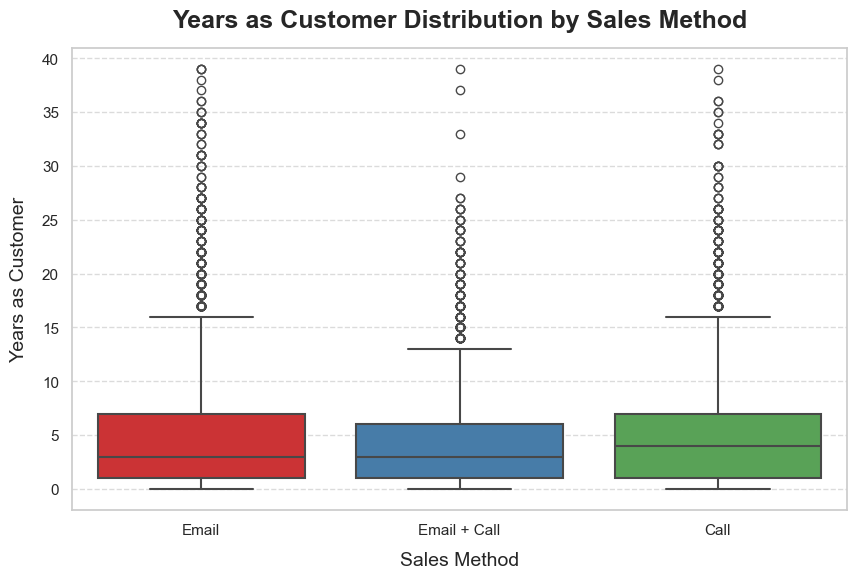

In [121]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='sales_method', y='years_as_customer', data=sales, palette="Set1", linewidth=1.5)
plt.title('Years as Customer Distribution by Sales Method', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Sales Method', fontsize=14, labelpad=10)
plt.ylabel('Years as Customer', fontsize=14, labelpad=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\mamma\AppData\Local\Temp\ipykernel_21224\1474848351.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sales_method', y='nb_sold', data=sales, palette="coolwarm", linewidth=1.5)


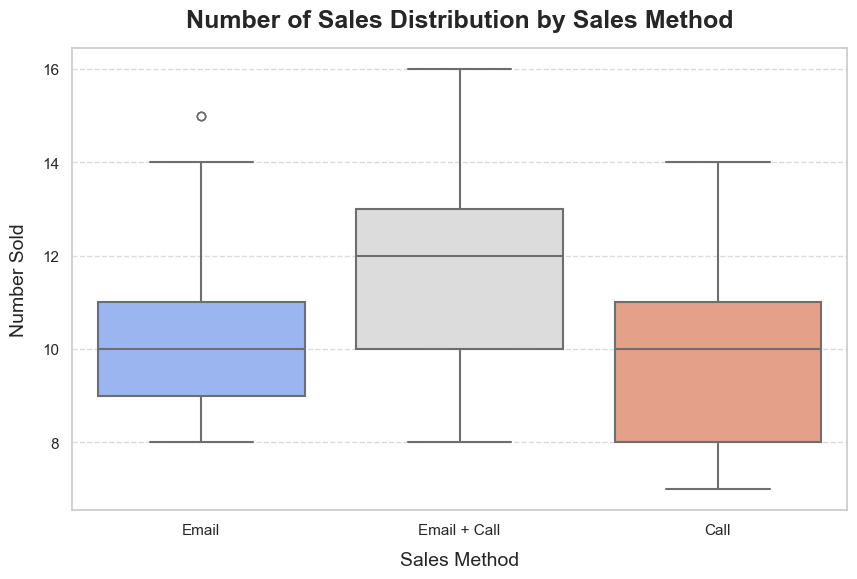

In [127]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='sales_method', y='nb_sold', data=sales, palette="coolwarm", linewidth=1.5)
plt.title('Number of Sales Distribution by Sales Method', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Sales Method', fontsize=14, labelpad=10)
plt.ylabel('Number Sold', fontsize=14, labelpad=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\mamma\AppData\Local\Temp\ipykernel_21224\1023296666.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sales_method', y='nb_site_visits', data=sales, palette="magma", linewidth=1.5)


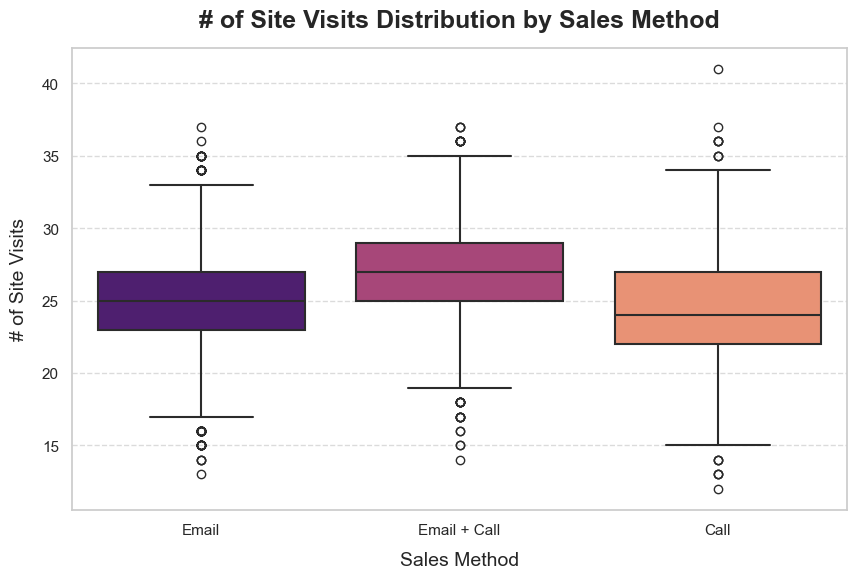

In [138]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='sales_method', y='nb_site_visits', data=sales, palette="magma", linewidth=1.5)
plt.title('# of Site Visits Distribution by Sales Method', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Sales Method', fontsize=14, labelpad=10)
plt.ylabel('# of Site Visits', fontsize=14, labelpad=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

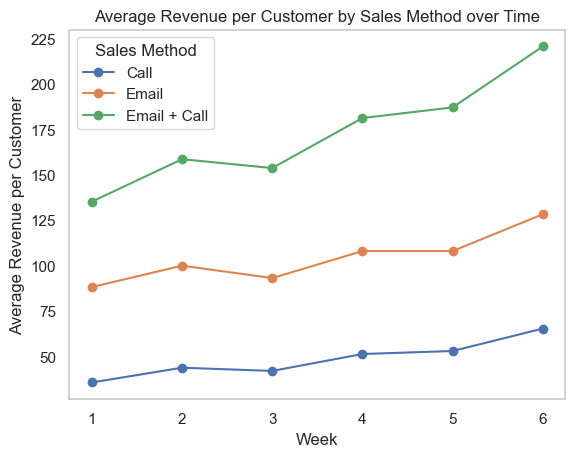

In [113]:
grouped_data = sales.groupby(['week', 'sales_method']).agg({'revenue': 'sum', 'customer_id': 'count'}).reset_index()
grouped_data['average_revenue_per_customer'] = grouped_data['revenue'] / grouped_data['customer_id']
pivot_data = grouped_data.pivot_table(index='week', columns='sales_method', values='average_revenue_per_customer')
pivot_data.plot(kind='line', marker='o')
plt.xlabel('Week')
plt.ylabel('Average Revenue per Customer')
plt.title('Average Revenue per Customer by Sales Method over Time')
plt.legend(title='Sales Method')
plt.grid()
plt.show()

In [141]:
# Define the sales effort for each sales method
sales_effort = {
    'Email': 0.5,
    'Call': 3,
    'Email + Call': 1
}

# Group the data by sales_method and aggregate the total revenue and number of customers
grouped_data = sales.groupby('sales_method').agg({'revenue': 'sum', 'customer_id': 'count'}).reset_index()

# Calculate ARCPSE for each sales method
grouped_data['ARCPSE'] = grouped_data.apply(lambda row: row['revenue'] / (row['customer_id'] * sales_effort[row['sales_method']]), axis=1)

# Display the ARCPSE for each sales method
print(grouped_data[['sales_method', 'ARCPSE']])

   sales_method      ARCPSE
0          Call   15.865822
1         Email  194.255368
2  Email + Call  183.651233


# Conclusion and Recommendations
Taking in all factors from the analysis it is recommended to focus on the Email + Call method for the following reasons:

* While 'Email' has the highest ARCPSE, the 'Email + Call' method generates more customer engagement, as evidenced by higher website visits and average items purchased. This could lead to stronger customer relationships and long-term growth.
* The 'Email + Call' method has shown a consistent upward trend in revenue generation over six weeks, indicating its potential for continued success.
* The 'Call' method is the least efficient in terms of effort and revenue generation and has a downward trend in revenue over time. In conclusion, the 'Email + Call' method should be prioritized for sales efforts, as it demonstrates better customer engagement, consistent revenue growth, and a more sustainable balance between effort and return.